In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ML.csv")

In [3]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [17]:
#Tipo de dados das respectivas colunas

df.dtypes

typeofaction     object
sourceid          int64
destinationid     int64
amountofmoney     int64
date             object
isfraud           int64
typeoffraud      object
dtype: object

In [18]:
#Verificação de valores nulos

df.isna().any()

typeofaction     False
sourceid         False
destinationid    False
amountofmoney    False
date             False
isfraud          False
typeoffraud      False
dtype: bool

In [19]:
#(Número de linhas, número de Colunas)

df.shape

(2340, 7)

<h3> 1.Análise Exploratória dos dados </h3>
<p>Estes dados estão baseados em 3 processos de lavagem de dinheiro que condizem respectivamente com o tipo de fraude: </p>
<ol>
<li> <strong> Money Placement </strong> </li>
<li> <strong> Money Layering</strong> </li>
<li> <strong> Money Integration</strong> </li>
</ol>

<p> Para cada processo, consideramos que: </p>
    <ol>
    <li> Processo 1, ocorre a operação de: <strong> Cashing  </strong>  </li>
    <li> Processo 2 e 3, ocorre a operação de: <strong> Transfer  </strong>  </li>
    </ol>

In [39]:
# Agrupamento do tipo de de ações do dataset e respectivas quantidades
pie_aml = df.groupby('typeofaction',axis=0)['amountofmoney'].sum()

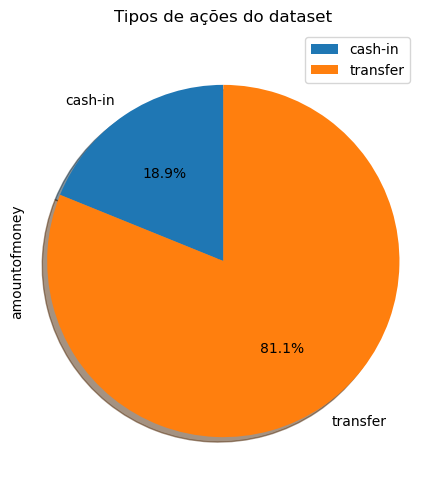

In [41]:
pie_aml.plot(kind='pie', figsize = (5,6), autopct = '%1.1f%%', startangle = 90, shadow= True )
plt.title('Tipos de ações do dataset')
plt.axis('equal')
plt.legend(labels=pie_aml.index, loc = 'upper right')
plt.show()

<h3> 2.Tratamento do 1º tipo de Fraude: Money Placement </h3>
<p> Money placement é uma técnica utilizada em atividades de branqueamento de capitais que consiste em <strong>colocar dinheiro ilícito diretamente em instituições financeiras.</strong> Isso pode ser feito através da abertura de contas bancárias em nome de pessoas físicas ou jurídicas fictícias, ou através do<strong> depósito de grandes quantias de dinheiro em contas já existentes.</strong>

In [7]:
#Seleção de linhas do DataSET cujo tipo de fraude seja de Money Placement (type1)

fraud_type1= df[df["typeoffraud"]=="type1"]

In [8]:
fraud_type1.head(25)

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1
5,cash-in,30105,54971,494528,2019-04-06 11:18:00,1,type1
6,cash-in,30105,62257,494528,2019-04-23 08:20:00,1,type1
7,cash-in,30105,1020,494528,2019-07-04 08:59:00,1,type1
8,cash-in,30105,98751,494528,2019-05-06 12:49:00,1,type1
9,cash-in,30105,82016,494528,2019-06-09 12:27:00,1,type1


In [9]:
#Agrupamento com base a fonte(sourceid), destino(destinationid), e quantidade de dinheiro(amountofmoney)

df_source_based = fraud_type1.groupby(["sourceid","destinationid"])["amountofmoney"].agg([np.min, np.max, np.sum, np.mean])

In [10]:
print(df_source_based.head(100))

                          amin    amax     sum      mean
sourceid destinationid                                  
1615     3335           639230  639230  639230  639230.0
         6054           639230  639230  639230  639230.0
         6322           639229  639229  639229  639229.0
         7203           639230  639230  639230  639230.0
         8552           639230  639230  639230  639230.0
...                        ...     ...     ...       ...
30105    8692           494528  494528  494528  494528.0
         12860          494529  494529  494529  494529.0
         13800          494528  494528  494528  494528.0
         20575          494528  494528  494528  494528.0
         23762          494529  494529  494529  494529.0

[100 rows x 4 columns]


In [11]:
# Verificação dos movimentos da conta nº 30105

_account = fraud_type1[fraud_type1["sourceid"]== 30105]

In [12]:
grouped_account = _account.groupby(["sourceid","destinationid"])["amountofmoney"].sum()
print(grouped_account)

sourceid  destinationid
30105     1020             494528
          3164             494529
          8692             494528
          12860            494529
          13800            494528
          20575            494528
          23762            494529
          24259            494529
          28942            494528
          45938            494528
          52681            494529
          54971            494528
          60094            494528
          61008            494529
          62257            494528
          64316            494529
          80113            494529
          82016            494528
          94472            494529
          98751            494528
Name: amountofmoney, dtype: int64


<p> Aqui podemos verificar que a fonte de nº:<strong> 30105 </strong> efetua vários dépositos com a mesma quantia em várias contas diferentes - Uma característica de Money Placement. </p>

<h3>3.Tratamento do 2º tipo de Fraude: Money Layering </h3>
<p>Money layering, ou camadas de dinheiro em português, é uma técnica utilizada em atividades de branqueamento de capitais para dificultar a identificação da origem dos recursos ilícitos. Essa técnica consiste em<strong> movimentar o dinheiro através de várias transações financeiras complexas</strong> e em diferentes jurisdições, a fim de obscurecer a trilha de onde o dinheiro veio. </p>

In [13]:
fraud_type2= df[df["typeoffraud"]=="type2"]

In [14]:
fraud_type2.head(20)

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
423,transfer,42454,32893,7270189,2019-02-25 11:50:00,1,type2
424,transfer,32893,30530,7270189,2019-03-12 11:43:00,1,type2
425,transfer,30530,36647,7270189,2019-03-17 10:25:00,1,type2
426,transfer,36647,64269,7270189,2019-05-29 10:06:00,1,type2
427,transfer,64269,48051,7270189,2019-05-31 09:00:00,1,type2
428,transfer,48051,1970,7270189,2019-07-16 12:45:00,1,type2
429,transfer,44881,76348,5983503,2019-03-06 14:51:00,1,type2
430,transfer,76348,96871,5983503,2019-03-21 13:42:00,1,type2
431,transfer,96871,70897,5983503,2019-04-10 12:57:00,1,type2
432,transfer,70897,98417,5983503,2019-04-16 13:05:00,1,type2


<h3>4.Tratamento do 3º Tipo de fraude: Money Integration</h3>
<p>

In [15]:
fraud_type3= df[df["typeoffraud"]=="type3"]

In [16]:
fraud_type3.tail(20)

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
1379,transfer,73912,95498,281506,2019-05-06 15:32:00,1,type3
1380,transfer,65179,95498,281506,2019-02-21 09:47:00,1,type3
1381,transfer,14146,95498,281506,2019-03-11 14:09:00,1,type3
1382,transfer,14092,95498,281506,2019-04-05 12:20:00,1,type3
1383,transfer,862,95498,281506,2019-07-18 09:11:00,1,type3
1384,transfer,28267,95498,281506,2019-04-06 10:56:00,1,type3
1385,transfer,51514,95498,281506,2019-05-31 14:09:00,1,type3
1386,transfer,14126,95498,281506,2019-06-13 09:11:00,1,type3
1387,transfer,53999,95498,281506,2019-03-18 15:11:00,1,type3
1388,transfer,95231,95498,281506,2019-06-11 14:47:00,1,type3
